In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [24]:
with open("movement_libras.data") as file:
    data = pd.read_csv(file, header=None)
data.iloc[:, 90].describe()

count    360.000000
mean       8.000000
std        4.326507
min        1.000000
25%        4.000000
50%        8.000000
75%       12.000000
max       15.000000
Name: 90, dtype: float64

In [3]:
diabetes_X, diabetes_y = data.iloc[:, 0:89], np.array(data.iloc[:, 90])

In [4]:
diabetes_X = np.array(diabetes_X)
# scaler = preprocessing.MinMaxScaler()
# scaled_df = scaler.fit_transform(diabetes_X)

In [5]:
# diabetes_X_train = scaled_df[:-100]
# diabetes_X_test = scaled_df[-100:]
# diabetes_y_train = diabetes_y[:-100]
# diabetes_y_test = diabetes_y[-100:]

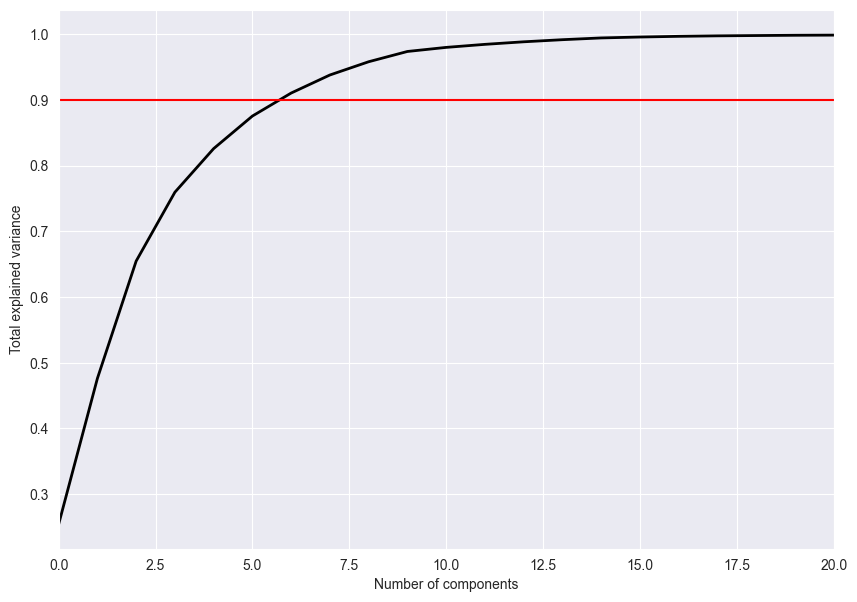

In [6]:
from sklearn import decomposition

pca = decomposition.PCA().fit(diabetes_X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 20)
#plt.yticks(np.arange(0, 1.1, 0.1))
#plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

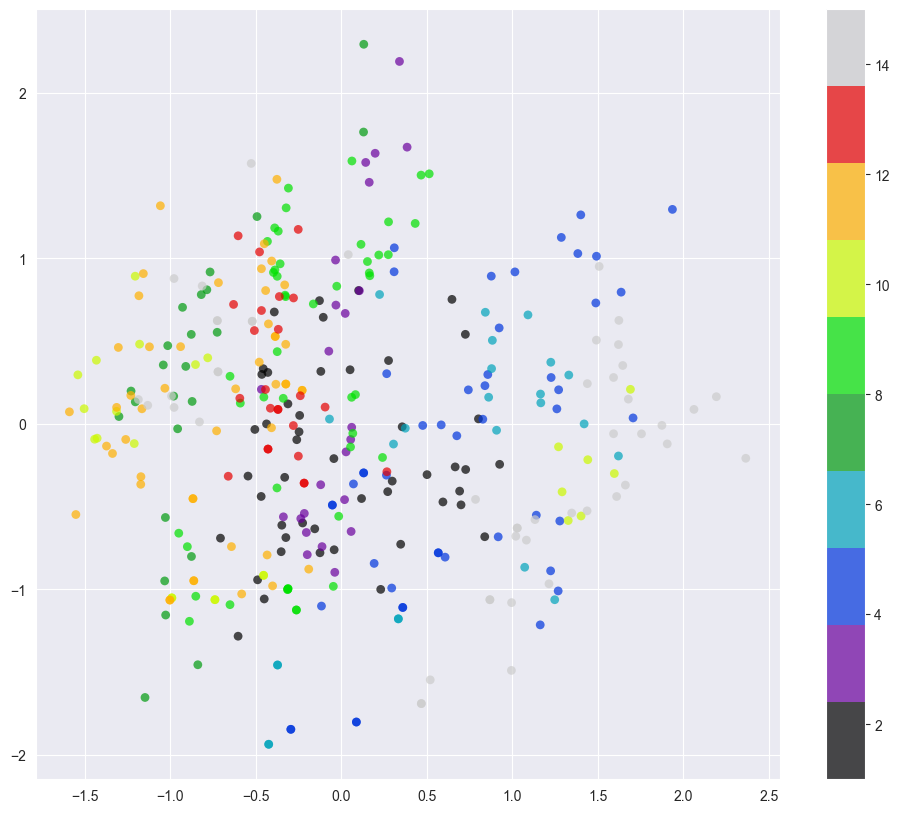

In [35]:
from sklearn.manifold import TSNE
pca = decomposition.PCA(n_components=15)
X_reduced = pca.fit_transform(diabetes_X)
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=diabetes_y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

In [36]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans

inertia = []
score = []

kmeans = KMeans(n_clusters=15).fit(diabetes_X)
y_predict = kmeans.predict(diabetes_X)
inertia.append(np.sqrt(kmeans.inertia_))
score.append(f1_score(diabetes_y, y_predict ,average='micro'))

results = [kmeans.inertia_]
clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
results += [m(diabetes_y, kmeans.labels_) for m in clustering_metrics]

# The silhouette score requires the full dataset
results += [
    metrics.silhouette_score(
        data,
        kmeans.labels_,
        metric="euclidean",
        sample_size=300,
    )
]
print("inertia\thomo\tcompl\tv-meas\tARI\t\tAMI\t\tsilhouette")
formatter_result = (
        "{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
print(formatter_result.format(*results))


inertia	homo	compl	v-meas	ARI		AMI		silhouette
309	0.587	0.595	0.591	0.315	0.536	0.004


https://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure

In [55]:
kmeans = KMeans(n_clusters=15).fit(X_reduced)
y_predict = kmeans.predict(X_reduced)


kmeans_results = [kmeans.inertia_]
clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
kmeans_results += [m(diabetes_y, kmeans.labels_) for m in clustering_metrics]

# The silhouette score requires the full dataset
kmeans_results += [
    metrics.silhouette_score(
        data,
        kmeans.labels_,
        metric="euclidean",
        sample_size=300,
    )
]
print("inertia\thomo\tcompl\tv-meas\tARI\t\tAMI\t\tsilhouette")
formatter_result = (
        "{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
print(formatter_result.format(*kmeans_results))

inertia	homo	compl	v-meas	ARI		AMI		silhouette
307	0.573	0.597	0.585	0.296	0.528	-0.016


In [54]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation().fit(X_reduced)
labels = af.labels_
af_results = []
clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
af_results += [m(diabetes_y, labels) for m in clustering_metrics]

# The silhouette score requires the full dataset
af_results += [
    metrics.silhouette_score(
        data,
        labels,
        metric="euclidean",
        sample_size=300,
    )
]

n_clusters_ = len(af.cluster_centers_indices_)

print("Estimated number of clusters: %d" % n_clusters_)
print("homo\tcompl\tv-meas\tARI\t\tAMI\t\tsilhouette")
formatter_result = (
        "{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
print(formatter_result.format(*af_results))

Estimated number of clusters: 31
homo	compl	v-meas	ARI		AMI		silhouette
0.720	0.587	0.646	0.288	0.551	0.083


In [53]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=15).fit(X_reduced)
labels = birch.labels_
birch_results = []
clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
birch_results += [m(diabetes_y, labels) for m in clustering_metrics]

# The silhouette score requires the full dataset
birch_results += [
    metrics.silhouette_score(
        data,
        labels,
        metric="euclidean",
        sample_size=300,
    )
]


n_clusters_ = len(np.unique(labels))

print("Estimated number of clusters: %d" % n_clusters_)
print("homo\tcompl\tv-meas\tARI\t\tAMI\t\tsilhouette")
formatter_result = (
        "{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
print(formatter_result.format(*birch_results))

Estimated number of clusters: 15
homo	compl	v-meas	ARI		AMI		silhouette
0.561	0.596	0.578	0.284	0.521	-0.040
